In [2]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv("./water_potability.csv")

#imputing with median, fills all NaN values with median
df['ph'] = df['ph'].fillna(df['ph'].median()) 
df['Hardness'] = df['Hardness'].fillna(df['Hardness'].median())
df['Solids'] = df['Solids'].fillna(df['Solids'].median())
df['Chloramines'] = df['Chloramines'].fillna(df['Chloramines'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Conductivity'] = df['Conductivity'].fillna(df['Conductivity'].median())
df['Organic_carbon'] = df['Organic_carbon'].fillna(df['Organic_carbon'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())
df['Turbidity'] = df['Turbidity'].fillna(df['Turbidity'].median())


In [20]:
type (df)
df.head() #shows first 5 lines
df.tail() #shows bottom 5 lines
df.shape #shape of df (rows, columns)
df.describe() #summary statistics for each column
df.isna() #where there is a null
df.isna().sum(axis=1) #sum of null values per row row = 1 column = 

3       0
4       0
5       0
6       0
7       0
       ..
3267    0
3268    0
3269    0
3270    0
3271    0
Length: 2011, dtype: int64

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values #capital X matrix snd lower case y vector
y = df.Potability.values #values turns it into numpy array
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [22]:
df.iloc[0, 0] #gives value on 0 index row and column 
df.iloc[:, 0]
df.iloc[:, 1:3]
df.iloc[:,:-1]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [29]:
train_test_split(X, y, test_size=0.2, random_state = 21) #training 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [51]:
rf_clf = RandomForestClassifier(random_state=21)
rf_clf.fit(X_train, y_train)
data =[[0,0,5,0,0,0,8.39,54.917862,	0],[5.584087,120,24748.687739,7.544869,325.678363,280.467916,8.399735,27.917862,2.559708]]
mydata = np.array(data)
y_pred = rf_clf.predict(mydata)
y_pred
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_pred)

array([1, 0])

In [31]:
#get baseline scores using Logistic Regression and Supper Vector Machines classifiers
#create confusion matrices. and learn about what those are and how to read them

In [32]:
np.random.seed(10)
np.random.random()


0.771320643266746

In [34]:
y_pred

array([1, 1])

In [12]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [13]:
#LOGISTIC REGRESSION 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline  # Import make_pipeline

# Load the dataset
df = pd.read_csv("./water_potability.csv")

#Separate features and target variable
X = df.iloc[:, :-1].values #capital X matrix snd lower case y vector
y = df.Potability.values #values turns it into numpy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values by deleting rows with NaN values
X_train_deleted = X_train[~np.isnan(X_train).any(axis=1)]
y_train_deleted = y_train[~np.isnan(X_train).any(axis=1)]




In [14]:
X_train.shape, X_train_deleted.shape


((2620, 9), (1598, 9))

/Users/irajshroff/anaconda3/envs/water-quality-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy with Deletion Method: 0.6053268765133172
Accuracy with Scaling: 0.5036319612590799
Confusion Matrix:
[[133 117]
 [ 88  75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       250
           1       0.39      0.46      0.42       163

    accuracy                           0.50       413
   macro avg       0.50      0.50      0.49       413
weighted avg       0.52      0.50      0.51       413



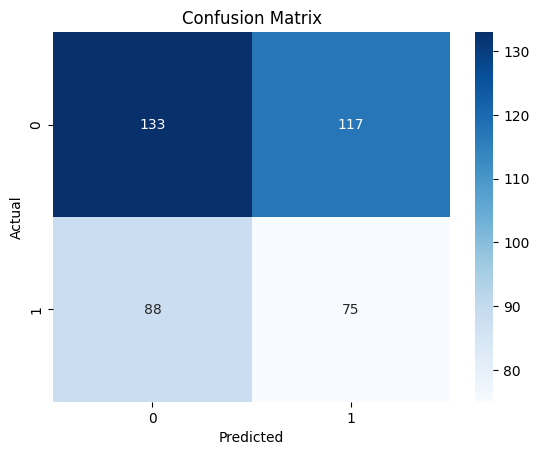

In [15]:

# Logistic Regression model without scaling for comparison
model_deleted = LogisticRegression(max_iter=1000)
model_deleted.fit(X_train_deleted, y_train_deleted)

# Test set without NaNs
X_test_no_nan = X_test[~np.isnan(X_test).any(axis=1)]
y_test_no_nan = y_test[~np.isnan(X_test).any(axis=1)]

# Accuracy with deletion method
accuracy_deleted = model_deleted.score(X_test_no_nan, y_test_no_nan)
print("Accuracy with Deletion Method:", accuracy_deleted)


# Define and fit the pipeline with scaling
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, class_weight='balanced')
)

# Fit the model on the training data
pipeline.fit(X_train_deleted, y_train_deleted)

# Predict on the test data
y_pred = pipeline.predict(X_test_no_nan)

# Evaluate the model
accuracy = accuracy_score(y_test_no_nan, y_pred)
conf_matrix = confusion_matrix(y_test_no_nan, y_pred)
class_report = classification_report(y_test_no_nan, y_pred,zero_division=0)
print(f'Accuracy with Scaling: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [55]:
#Support Vector Machine (SVM)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("./water_potability.csv")

df.dropna(inplace=True)

X = df.iloc[:, :-1].values #capital X matrix snd lower case y vector
y = df.Potability.values #values turns it into numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf', random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[278  31]
 [116  78]]


0.7077534791252486

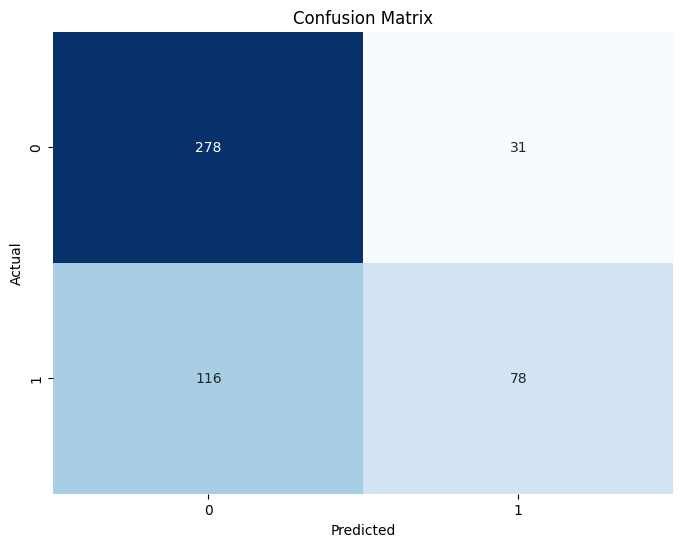

In [17]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)

# Add labels, title, and ticks
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(ticks=[0.5, 1.5], labels=['0', '1']) 
plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])

# Display the plot
plt.show()


In [18]:
# custom loss fn, find baseline scores
# impute with median
# perform K-fold cross validation on each model. this will serve as the more representative baseline score

In [56]:
#logistic regression with imputing - accuracy  3% greater than deleting all rows
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import make_pipeline  # Import make_pipeline

# Load the dataset
df = pd.read_csv("./water_potability.csv")
df['ph'] = df['ph'].fillna(df['ph'].median()) 
df['Hardness'] = df['Hardness'].fillna(df['Hardness'].median())
df['Solids'] = df['Solids'].fillna(df['Solids'].median())
df['Chloramines'] = df['Chloramines'].fillna(df['Chloramines'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Conductivity'] = df['Conductivity'].fillna(df['Conductivity'].median())
df['Organic_carbon'] = df['Organic_carbon'].fillna(df['Organic_carbon'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())
df['Turbidity'] = df['Turbidity'].fillna(df['Turbidity'].median())
#Separate features and target variable
X = df.iloc[:, :-1].values #capital X matrix snd lower case y vector
y = df.Potability.values #values turns it into numpy array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Logistic Regression model without scaling for comparison
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


# Accuracy with deletion method
accuracy = model_deleted.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6280487804878049


/Users/irajshroff/anaconda3/envs/water-quality-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:

#K fold cross validation on Random Forest, Logistic, and SVM
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


df = pd.read_csv("./water_potability.csv")

#imputing with median, fills all NaN values with median
df['ph'] = df['ph'].fillna(df['ph'].median()) 
df['Hardness'] = df['Hardness'].fillna(df['Hardness'].median())
df['Solids'] = df['Solids'].fillna(df['Solids'].median())
df['Chloramines'] = df['Chloramines'].fillna(df['Chloramines'].median())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].median())
df['Conductivity'] = df['Conductivity'].fillna(df['Conductivity'].median())
df['Organic_carbon'] = df['Organic_carbon'].fillna(df['Organic_carbon'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].median())
df['Turbidity'] = df['Turbidity'].fillna(df['Turbidity'].median())

X = df.iloc[:, :-1].values #capital X matrix snd lower case y vector
y = df.Potability.values #values turns it into numpy array

kf = StratifiedKFold(n_splits=5, shuffle = True, random_state=43)
cnt = 1
for train_index, test_index in kf.split(X,y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set: {len(test_index)}')
    cnt+=1

score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score Random Forest Classifier: {"{:.2f}".format(score.mean())}')

score = cross_val_score(SVC(random_state=42), X, y, cv=kf, scoring="accuracy")

print(f'Scores for each fold are: {score}')
print(f'Average score SVM: {"{:.2f}".format(score.mean())}')



Fold:1, Train set: 2620, Test set: 656
Fold:2, Train set: 2621, Test set: 655
Fold:3, Train set: 2621, Test set: 655
Fold:4, Train set: 2621, Test set: 655
Fold:5, Train set: 2621, Test set: 655
Scores for each fold are: [0.64939024 0.65954198 0.67175573 0.68854962 0.6610687 ]
Average score Random Forest Classifier: 0.67
Scores for each fold are: [0.6097561  0.61068702 0.61068702 0.60916031 0.60916031]
Average score SVM: 0.61
